<a href="https://colab.research.google.com/github/krsha-nit/PyTorch/blob/main/4_Regression.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import torch
import torch.nn as nn
import numpy as np
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D

In [2]:
# 1. dataset
N = 1000
X = np.random.random((N,2))*6-3 # uniformly distributed between -3 and 3
Y = np.cos(2*X[:,0])+np.cos(3*X[:,1])

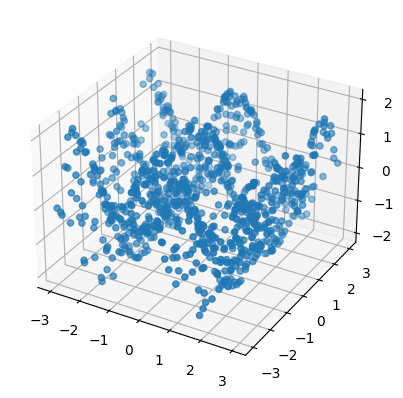

In [3]:
# plot
fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')
ax.scatter(X[:,0],X[:,1],Y)
plt.show()

In [4]:
# 2. create the model
model = nn.Sequential(
    nn.Linear(2,128),
    nn.ReLU(),
    nn.Linear(128,1)
)
## loss and optimizer
criterion = nn.MSELoss()
optimizer = torch.optim.Adam(model.parameters(),lr=0.01)

In [7]:
# 3. train the model
def full_gd(model, criterion, optimizer, X_train, y_train, epochs=1000):
  train_losses = np.zeros(epochs)
  for epoch in range(epochs):
    ## zero the parameter gradient
    optimizer.zero_grad()
    ## forward pass
    outputs = model(X_train)
    loss = criterion(outputs,y_train)
    ## backward pass and optimize
    loss.backward()
    optimizer.step()
    ## save losses
    train_losses[epoch] = loss.item()

    if (epoch+1)%50==0:
      print(f"Epoch {epoch+1}/{epochs}, Train Loss: {loss.item():.4f}")

  return train_losses

In [8]:
EPOCHS=1500
X_train = torch.from_numpy(X.astype(np.float32))
y_train = torch.from_numpy(Y.astype(np.float32).reshape(-1,1))
train_losses = full_gd(model,criterion,optimizer,X_train,y_train,epochs=EPOCHS)

Epoch 50/1500, Train Loss: 0.6522
Epoch 100/1500, Train Loss: 0.2912
Epoch 150/1500, Train Loss: 0.1785
Epoch 200/1500, Train Loss: 0.0644
Epoch 250/1500, Train Loss: 0.0166
Epoch 300/1500, Train Loss: 0.0094
Epoch 350/1500, Train Loss: 0.0057
Epoch 400/1500, Train Loss: 0.0057
Epoch 450/1500, Train Loss: 0.0037
Epoch 500/1500, Train Loss: 0.0034
Epoch 550/1500, Train Loss: 0.0031
Epoch 600/1500, Train Loss: 0.0027
Epoch 650/1500, Train Loss: 0.0028
Epoch 700/1500, Train Loss: 0.0027
Epoch 750/1500, Train Loss: 0.0023
Epoch 800/1500, Train Loss: 0.0023
Epoch 850/1500, Train Loss: 0.0025
Epoch 900/1500, Train Loss: 0.0021
Epoch 950/1500, Train Loss: 0.0020
Epoch 1000/1500, Train Loss: 0.0025
Epoch 1050/1500, Train Loss: 0.0019
Epoch 1100/1500, Train Loss: 0.0018
Epoch 1150/1500, Train Loss: 0.0020
Epoch 1200/1500, Train Loss: 0.0018
Epoch 1250/1500, Train Loss: 0.0017
Epoch 1300/1500, Train Loss: 0.0021
Epoch 1350/1500, Train Loss: 0.0194
Epoch 1400/1500, Train Loss: 0.0017
Epoch 1450/1

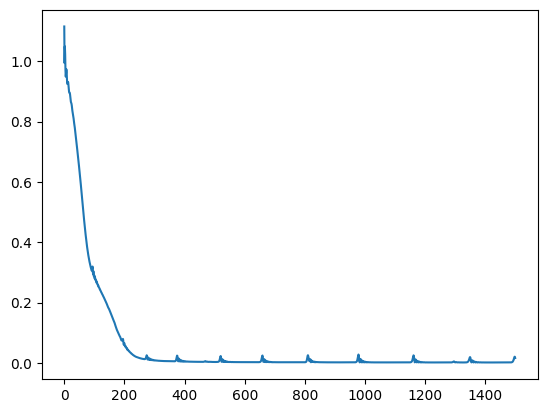

In [9]:
plt.plot(train_losses)

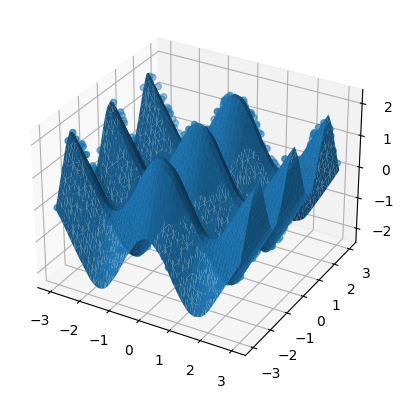

In [12]:
# 5. predictions
## plot the prediction surface
fig = plt.figure()
ax = fig.add_subplot(111,projection='3d')
ax.scatter(X[:,0],X[:,1],Y)
## surface plot
with torch.no_grad():
  line = np.linspace(-3,3,50)
  xx, yy = np.meshgrid(line,line)
  Xgrid = np.vstack((xx.flatten(),yy.flatten())).T
  Xgrid_torch = torch.from_numpy(Xgrid.astype(np.float32))
  Yhat = model(Xgrid_torch).numpy().flatten()
  ax.plot_trisurf(Xgrid[:,0],Xgrid[:,1],Yhat,linewidth=0.2,antialiased=True)
  plt.show()

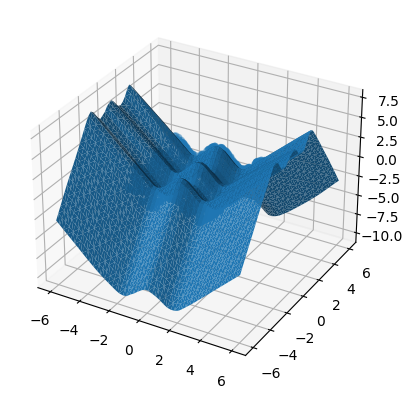

In [13]:
# HW: Can it be extrapolated? Ans- No
## plot the prediction surface
fig = plt.figure()
ax = fig.add_subplot(111,projection='3d')
ax.scatter(X[:,0],X[:,1],Y)
## surface plot
with torch.no_grad():
  line = np.linspace(-6,6,50)
  xx, yy = np.meshgrid(line,line)
  Xgrid = np.vstack((xx.flatten(),yy.flatten())).T
  Xgrid_torch = torch.from_numpy(Xgrid.astype(np.float32))
  Yhat = model(Xgrid_torch).numpy().flatten()
  ax.plot_trisurf(Xgrid[:,0],Xgrid[:,1],Yhat,linewidth=0.2,antialiased=True)
  plt.show()